## Data Science Capstone Project One: Flight Cancellation Prediction

### 3. Exploratory Data Analysis
In this part of the project, we'll focus on gaining insights and understanding about the data.  Features will be investigated using either visualization tools or statistics models.  The goal is to have a better understanding of the core characteristics of the data and identify statistical relationship strengths that could be used to develop hypotheses for further analysis.


### 3.1 Sourcing & Loading

#### 3.1.1 Import relevant libraries and packages


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### 3.1.2 Import & review data

In [49]:
df = pd.read_csv("flight_lax.csv")

In [50]:
df.head(3)

,Unnamed: 0,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED,DESTINATION_CITY,DESTINATION_STATE,AIRLINE
0,0,1,1,4,2336,PBI,10,280.0,2330,750,0,West Palm Beach,FL,American Airlines Inc.
1,1,1,1,4,258,MIA,20,285.0,2342,805,0,Miami,FL,American Airlines Inc.
2,2,1,1,4,2013,CLT,30,273.0,2125,803,0,Charlotte,NC,US Airways Inc.


In [51]:
# Let's get rid of the first column "Unnamed:0" and then check the size of the data.
df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(df.shape)
df.head(5)

(211388, 13)


,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED,DESTINATION_CITY,DESTINATION_STATE,AIRLINE
0,1,1,4,2336,PBI,10,280.0,2330,750,0,West Palm Beach,FL,American Airlines Inc.
1,1,1,4,258,MIA,20,285.0,2342,805,0,Miami,FL,American Airlines Inc.
2,1,1,4,2013,CLT,30,273.0,2125,803,0,Charlotte,NC,US Airways Inc.
3,1,1,4,1434,MSP,35,214.0,1535,609,0,Minneapolis,MN,Delta Air Lines Inc.
4,1,1,4,115,MIA,105,286.0,2342,851,0,Miami,FL,American Airlines Inc.


### 3.2 Data Exploration

#### 3.2.1 Airline Overview

First of all, we want to see if there's any possible relationship between airlines and flight cancellations.

In [52]:
airline = pd.DataFrame()
airline['TOTAL_FLIGHTS'] = df[['AIRLINE', 'CANCELLED']].groupby('AIRLINE').count()

In [53]:
airline['CANCELLED'] = df[['AIRLINE', 'CANCELLED']].groupby('AIRLINE').sum()
airline['%_CANCELLED'] = airline['CANCELLED']/airline['TOTAL_FLIGHTS']
airline.sort_values(by = '%_CANCELLED', ascending=[False])

,TOTAL_FLIGHTS,CANCELLED,%_CANCELLED
AIRLINE,,,
American Eagle Airlines Inc.,184,13,0.070652
Southwest Airlines Co.,40818,830,0.020334
Skywest Airlines Inc.,39078,463,0.011848
Spirit Air Lines,4801,56,0.011664
United Air Lines Inc.,29852,306,0.010251
American Airlines Inc.,35831,333,0.009294
JetBlue Airways,4465,35,0.007839
US Airways Inc.,3688,27,0.007321
Virgin America,12877,76,0.005902


American Eagle Airlines is ranked No.1 in terms of % of flights canceled. However, if we look at the absolute number of flight cancellations, American Eagle Airlines' number is 13, extremely low compared to the 2nd place, Southwest Airlines, which has 830 flight cancellations but only 2% cancellation rate as a result of the large number of flights Southwest has out of LAX.  Since we are interested in the absolute number of flights in this study, we'll focus on the numbers of flight cancellation instead of percentages.

In [54]:
airline = airline.sort_values(by = 'CANCELLED', ascending=[False])
airline

,TOTAL_FLIGHTS,CANCELLED,%_CANCELLED
AIRLINE,,,
Southwest Airlines Co.,40818,830,0.020334
Skywest Airlines Inc.,39078,463,0.011848
American Airlines Inc.,35831,333,0.009294
United Air Lines Inc.,29852,306,0.010251
Virgin America,12877,76,0.005902
Spirit Air Lines,4801,56,0.011664
Delta Air Lines Inc.,27667,54,0.001952
JetBlue Airways,4465,35,0.007839
US Airways Inc.,3688,27,0.007321


Text(0.5, 1.0, 'FLIGHTS CANCELLED BY AIRLINE')

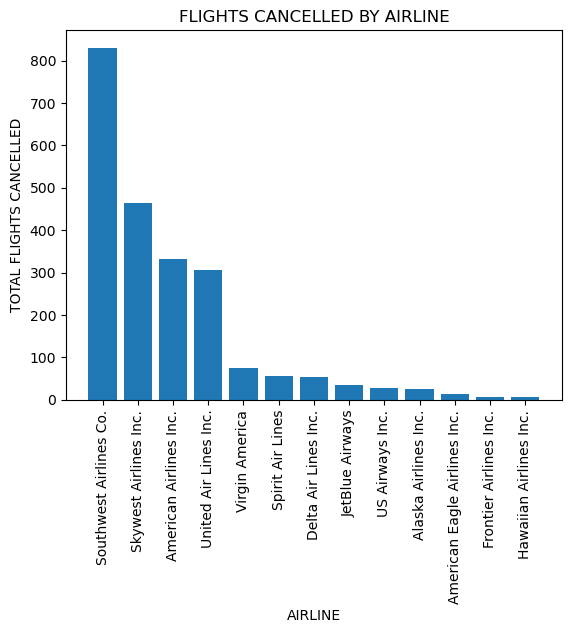

In [55]:
airline = airline.reset_index().sort_values('CANCELLED', ascending=False)
plt.bar(airline['AIRLINE'], airline['CANCELLED'])
plt.xlabel('AIRLINE')
plt.ylabel('TOTAL FLIGHTS CANCELLED')
plt.xticks(rotation=90)
plt.title('FLIGHTS CANCELLED BY AIRLINE')

As illustrated in the above file and bar plot, Southwest has the most flight cancellations, followed by Skywest Airlines, American Airlines and United Air Lines.  The rest of the airlines have significantly less flight cancellations.  

#### 3.2.2 Destination Overview

Next, let's take a look at the role destination plays in flight cancellation.

In [56]:
df.DESTINATION_AIRPORT.unique()

array(['PBI', 'MIA', 'CLT', 'MSP', 'IAH', 'DEN', 'DFW', 'ORD', 'SEA',
       'ATL', 'EWR', 'SFO', 'STL', 'JFK', 'LAS', 'PHL', 'AUS', 'PHX',
       'PDX', 'BOS', 'DTW', 'SLC', 'HNL', 'BNA', 'CLD', 'IAD', 'SMF',
       'DAL', 'SAN', 'MCO', 'SAT', 'TUS', 'JAC', 'ASE', 'RDU', 'BZN',
       'DCA', 'OGG', 'BOI', 'EGE', 'ELP', 'BWI', 'KOA', 'MCI', 'MRY',
       'RNO', 'COS', 'LIH', 'ABQ', 'MDW', 'FAT', 'HOU', 'PSP', 'SJC',
       'SBA', 'FLL', 'SAF', 'MKE', 'CMH', 'OAK', 'SBP', 'IND', 'PIT',
       'EUG', 'TPA', 'CVG', 'MSY', 'SMX', 'HDN', 'ICT', 'CLE', 'ITO',
       'RDM', 'MEM', 'OKC', 'GEG', 'ANC', 'MTJ', 'OMA', 'MSN', 'SNA'],
      dtype=object)

In [57]:
df.DESTINATION_STATE.unique()

array(['FL', 'NC', 'MN', 'TX', 'CO', 'IL', 'WA', 'GA', 'NJ', 'CA', 'MO',
       'NY', 'NV', 'PA', 'AZ', 'OR', 'MA', 'MI', 'UT', 'HI', 'TN', 'VA',
       'WY', 'MT', 'ID', 'MD', 'NM', 'WI', 'OH', 'IN', 'KY', 'LA', 'KS',
       'OK', 'AK', 'NE'], dtype=object)

There are so many different destination airports that it may take a lot of time to go through all of the airport data.  Since the total number of states are significantly less, let's take a look at the state statistics first.  The state level data might give us some hint whether the airport-level data is worth looking into or not.

In [58]:
destination_state = pd.DataFrame()
destination_state['TOTAL_FLIGHTS'] = df[['DESTINATION_STATE', 'CANCELLED']].groupby('DESTINATION_STATE').count()
destination_state['CANCELLED'] = df[['DESTINATION_STATE', 'CANCELLED']].groupby('DESTINATION_STATE').sum()
destination_state['%_CANCELLED'] = destination_state['CANCELLED']/destination_state['TOTAL_FLIGHTS']
destination_state = destination_state.sort_values(by = 'CANCELLED', ascending=[False])
destination_state.head(5)

,TOTAL_FLIGHTS,CANCELLED,%_CANCELLED
DESTINATION_STATE,,,
CA,47744,1028,0.021532
TX,21719,194,0.008932
NY,13052,143,0.010956
IL,11051,126,0.011402
AZ,10801,100,0.009258


The above data reveals that CA is the top state in terms of both the total number and percentage of flights canceled. The 2nd place, Texas, only has less than 1/5 of the total cancellations California has.  Total flight cancellations for the rest of the states are even lower.

Text(0.5, 1.0, 'FLIGHTS CANCELLED BY DESTINATION STATE')

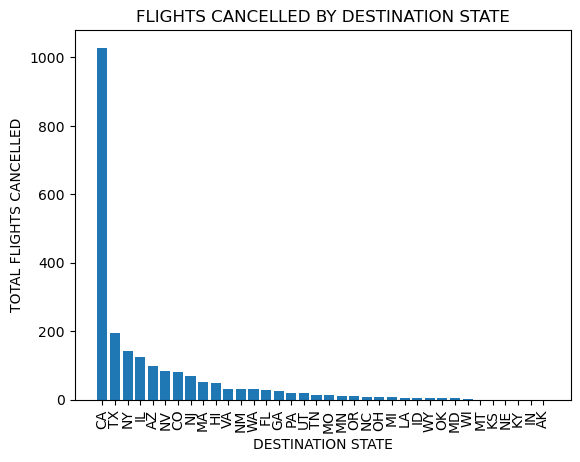

In [59]:
destination_state = destination_state.reset_index().sort_values(by = 'CANCELLED', ascending=False)
plt.bar(destination_state['DESTINATION_STATE'], destination_state['CANCELLED'] )
plt.xlabel('DESTINATION STATE')
plt.ylabel('TOTAL FLIGHTS CANCELLED')
plt.xticks(rotation=90)
plt.title('FLIGHTS CANCELLED BY DESTINATION STATE')

Since CA has such a high cancellation number compared to all the other states, it will be interesting to find out where most of these cancellations occur in terms of destination airports.  Next, let's dig into it.  

In [60]:
ca = df[(df['DESTINATION_STATE']=='CA')]
ca_airport = pd.DataFrame()
ca_airport['TOTAL_FLIGHTS'] = ca[['DESTINATION_AIRPORT', 'CANCELLED']].groupby('DESTINATION_AIRPORT').count()
ca_airport['CANCELLED'] = ca[['DESTINATION_AIRPORT', 'CANCELLED']].groupby('DESTINATION_AIRPORT').sum()
ca_airport['%_CANCELLED'] = ca_airport['CANCELLED']/ca_airport['TOTAL_FLIGHTS']
ca_airport.sort_values(by = 'CANCELLED', ascending=[False])

,TOTAL_FLIGHTS,CANCELLED,%_CANCELLED
DESTINATION_AIRPORT,,,
SFO,14722,361,0.024521
OAK,6844,239,0.034921
SJC,6763,142,0.020997
SAN,4831,70,0.014490
SMF,6050,62,0.010248
MRY,1641,56,0.034126
SBP,1488,31,0.020833
SBA,1599,28,0.017511
FAT,2163,18,0.008322


Text(0.5, 1.0, 'FLIGHTS CANCELLED BY DESTINATION AIRPORT IN CA')

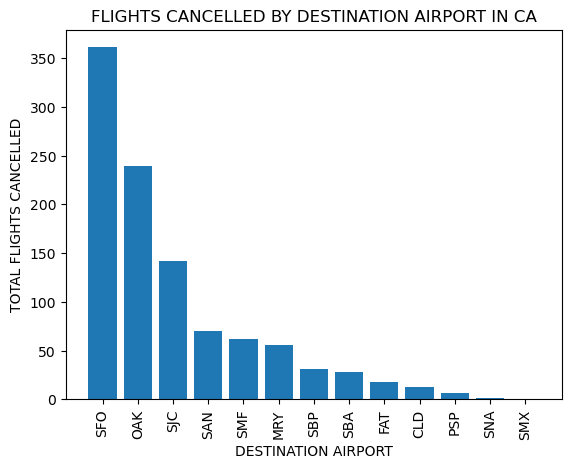

In [61]:
ca_airport = ca_airport.reset_index().sort_values(by = 'CANCELLED', ascending=[False])
plt.bar(ca_airport['DESTINATION_AIRPORT'], ca_airport['CANCELLED'])
plt.xlabel('DESTINATION AIRPORT')
plt.ylabel('TOTAL FLIGHTS CANCELLED')
plt.xticks(rotation=90)
plt.title('FLIGHTS CANCELLED BY DESTINATION AIRPORT IN CA')

Most of the flight cancellations in CA occur with destination airports of SFO (San Francisco), OAK (Oakland) and SJC (San Jose).  Interestingly, all three airports are in Northern CA around the bay area.  The cancellation numbers for these three destination airports are so that they would have ranked number 2, 3 and 6 respectively if they were considered as states and ranked with all the states.  

Although the destination airport and destination city columns are not the exact duplicates of each other, they may contain the same type of information.  Let's take a deep look into these two columns to see if we need to keep both or can do well with just one of them.  

In [62]:
destination_airport = pd.DataFrame()
destination_airport['TOTAL_FLIGHTS'] = df[['DESTINATION_AIRPORT', 'CANCELLED']].groupby('DESTINATION_AIRPORT').count()
destination_airport['CANCELLED'] = df[['DESTINATION_AIRPORT', 'CANCELLED']].groupby('DESTINATION_AIRPORT').sum()
destination_airport['%_CANCELLED'] = destination_airport['CANCELLED']/destination_airport['TOTAL_FLIGHTS']
destination_airport.sort_values(by = 'CANCELLED', ascending=[False]).head(20)

,TOTAL_FLIGHTS,CANCELLED,%_CANCELLED
DESTINATION_AIRPORT,,,
SFO,14722,361,0.024521
OAK,6844,239,0.034921
JFK,13052,143,0.010956
SJC,6763,142,0.020997
ORD,9021,107,0.011861
DFW,7241,97,0.013396
PHX,7975,85,0.010658
EWR,5019,71,0.014146
LAS,10483,70,0.006677


In [63]:
city = pd.DataFrame()
city['TOTAL_FLIGHTS'] = df[['DESTINATION_CITY', 'CANCELLED']].groupby('DESTINATION_CITY').count()
city['CANCELLED'] = df[['DESTINATION_CITY', 'CANCELLED']].groupby('DESTINATION_CITY').sum()
city['%_CANCELLED'] = city['CANCELLED']/city['TOTAL_FLIGHTS']
city.sort_values(by = 'CANCELLED', ascending=[False]).head(20)

,TOTAL_FLIGHTS,CANCELLED,%_CANCELLED
DESTINATION_CITY,,,
San Francisco,14722,361,0.024521
Oakland,6844,239,0.034921
New York,13052,143,0.010956
San Jose,6763,142,0.020997
Chicago,11051,126,0.011402
Dallas-Fort Worth,7241,97,0.013396
Phoenix,7975,85,0.010658
San Diego,5471,83,0.015171
Newark,5019,71,0.014146


As we can see from the above two lists, most of the destination airport and destination city information match, except in a few cases like San Diego and Houston.  These exceptional cities have multiple airports that are all operational and fly flights.  This has caused the number for those cities to be slightly different from the number for the airports in those cities.  However, that doesn't constitute a significant difference, and the benefit of getting rid of the destination city column is far more than keeping both columns.  Therefore, this is what we'll do, and we'll work on the destination airport column for the rest of this project. 

In [64]:
df = df = df.drop('DESTINATION_CITY', axis=1)

#### 3.2.3 Month & Day Overview

Here, we want to explore if the month, the day and the day of the week each has an impact on flight cancellation.

In [65]:
month = pd.DataFrame()
month['TOTAL_FLIGHTS'] = df[['MONTH', 'CANCELLED']].groupby('MONTH').count()
month['CANCELLED'] = df[['MONTH', 'CANCELLED']].groupby('MONTH').sum()
month['%_CANCELLED'] = month['CANCELLED']/month['TOTAL_FLIGHTS']
month

,TOTAL_FLIGHTS,CANCELLED,%_CANCELLED
MONTH,,,
1,17340,251,0.014475
2,15762,327,0.020746
3,18014,183,0.010159
4,17408,103,0.005917
5,17977,97,0.005396
6,18533,280,0.015108
7,19371,283,0.014609
8,19265,244,0.012665
9,17499,104,0.005943


In [66]:
cancel = df[df['CANCELLED']==1]

Text(0.5, 1.0, 'FLIGHTS CANCELLED BY MONTH')

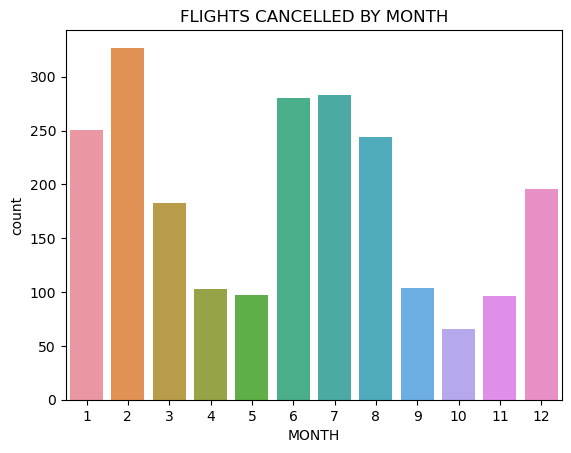

In [67]:
sns.countplot(x='MONTH', data=cancel)
plt.title('FLIGHTS CANCELLED BY MONTH')

Based upon the above data and chart, February seems to have the highest number of flight cancellations, 327 or 2%. Interestingly, February's total number of flights isn't the highest.  July and June are the 2nd and 3rd place, with 283 and 280 cancellations respectively.  January and August numbers are also pretty high, at 251 and 244 respectively.  Overall, summer time and beginning of the year seem to be the two periods with the highest cancellation numbers.  

Text(0.5, 1.0, 'FLIGHTS CANCELLED BY DAY')

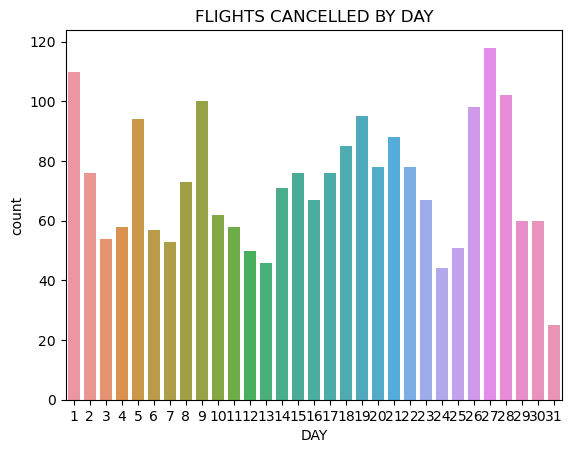

In [68]:
sns.countplot(x='DAY', data=cancel)
plt.title('FLIGHTS CANCELLED BY DAY')

Certain days during the month do have high cancellations, such as at the beginning and end of a month, as well as around the middle of the month.  However, there doesn't seem to be a clear pattern or obvious reason showing why more cancellations occur on certain days than the others.

Next, let's look at the day of the week.

In [69]:
day_of_week = pd.DataFrame()
day_of_week['TOTAL_FLIGHTS'] = df[['DAY_OF_WEEK', 'CANCELLED']].groupby('DAY_OF_WEEK').count()
day_of_week['CANCELLED'] = df[['DAY_OF_WEEK', 'CANCELLED']].groupby('DAY_OF_WEEK').sum()
day_of_week['%_CANCELLED'] = day_of_week['CANCELLED']/day_of_week['TOTAL_FLIGHTS']
day_of_week

,TOTAL_FLIGHTS,CANCELLED,%_CANCELLED
DAY_OF_WEEK,,,
1,31412,437,0.013912
2,30562,422,0.013808
3,30859,325,0.010532
4,31600,309,0.009778
5,30931,252,0.008147
6,25987,199,0.007658
7,30037,286,0.009522


Text(0.5, 1.0, 'FLIGHTS CANCELLED BY DAY OF WEEK')

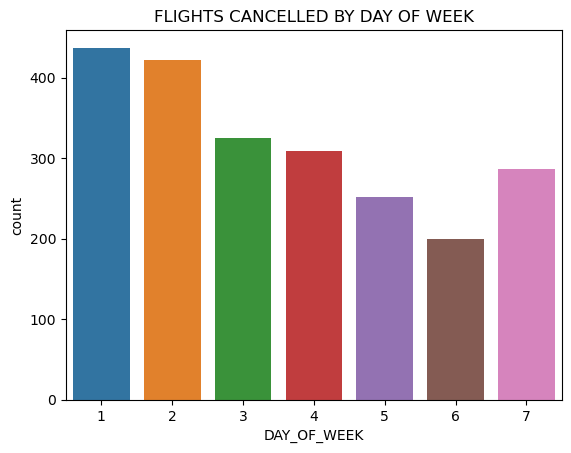

In [70]:
sns.countplot(x='DAY_OF_WEEK', data=cancel)
plt.title('FLIGHTS CANCELLED BY DAY OF WEEK')

Monday and Tuesday seem to have the highest number of cancellations.  As the week goes by, the cancellation starts to fall gradually, and rebound on Sunday.  This is an interesting observation, although we do not see any logic driving force behind this pattern.

#### 3.2.4 Flight Number, Departure Time, Scheduled Time, Distance, Arrival Time, etc.

There are other elements such as flight numbers, departure time, scheduled (air) time, distances and arrival time that we haven't studied yet.  Since these are all numbers and mostly continuous variables, we'll use heatmap to evaluate the coorelationship these features have with flight cancellation.

C:\Users\wfgyi\AppData\Local\Temp\ipykernel_26156\1616052611.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, annot_kws={'size': 8})


<Axes: >

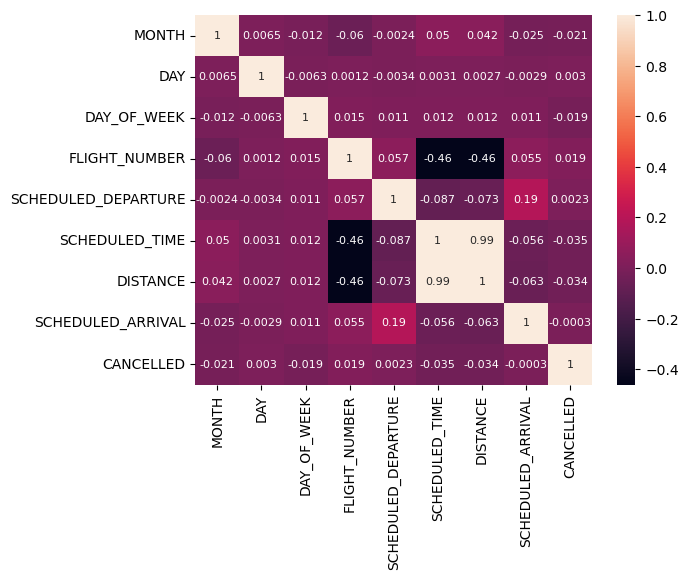

In [71]:
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 8})

Since the data contains several categorical columns and the heatmap only shows the numeric columns, we'll do a PPS matrix here to see if it gives us any additional insight.

As illustrated by the heatmap, the scheduled time and distance are highly correlated with the flight number.  Also, it's not surprising that scheduled arrival is correlated with scheduled departure.  

For flight cancellation, the month, the day of the week, the flight number, the scheduled time and the distance all have strong correlations of either +1% or -1%.  Scheduled departure and scheduled arrival appear to have the least correlations with cancellation, at a rate of 0.23% and 0.03% respectively.  The day of the month also doesn't seem to be correlated with cancellation at 0.3%.

In summary, numerous variables of MONTH, DAY_OF_WEEK, FLIGHT_NUMBER, SCHEDULED_TIME, DISTANCE, along with categorical variables of DESTINATION_AIRPORT, DESTINATION_STATE and AIRLINE all have relatively strong correlations with flight cancellation and will be our targeted features in the modeling phase of the project.


In [74]:
# Save the data for next phase of the project.
df.to_csv("flight_lax_eda.csv")
airline.to_csv("airline.csv")
destination_state.to_csv("destination_state.csv")
destination_airport.to_csv("destination_airport.csv")